In [46]:
import sys
sys.path.insert(0, '../../')
import math
import numpy as np
import matplotlib.pyplot as plt
from gasp import ssfp, responses, simulation, dataset, get_project_path, gasp as GASP

In [47]:
path = get_project_path()
M = dataset.load_dataset9a(path)
M.shape

Data: 20231222_GASP_PHANTOM data exists
Path: ../..\gasp\../data\20231222_GASP_PHANTOM\dixon\
Loading files: ['meas_MID210_gre_TE3p41_FID58122.dat', 'meas_MID211_gre_TE4p55_FID58123.dat', 'meas_MID212_gre_TE5p68_FID58124.dat']
pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/2.68M [00:00<?, ?B/s]

read data:   0%|          | 0/128 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/2.68M [00:00<?, ?B/s]

read data:   0%|          | 0/128 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/2.68M [00:00<?, ?B/s]

read data:   0%|          | 0/128 [00:00<?, ?it/s]

(128, 128, 8, 3)

In [48]:
M0 = M[:,:,:,0]
M1 = M[:,:,:,1]
M2 = M[:,:,:,2]

field_map = np.angle(np.conjugate(M0) * M2)
f = np.exp(-1j * field_map / 2)
Mw = M0 + M1
Mf = M0 - M1
Mw3 = M0 + M1 * np.exp(-1j * field_map / 2)
Mf3 = M0 - M1 * np.exp(-1j * field_map / 2)

Mw = np.sqrt(np.sum(np.abs(Mw)**2, axis=2))
Mf = np.sqrt(np.sum(np.abs(Mf)**2, axis=2))
Mw3 = np.sqrt(np.sum(np.abs(Mw3)**2, axis=2))
Mf3 = np.sqrt(np.sum(np.abs(Mf3)**2, axis=2))

[]

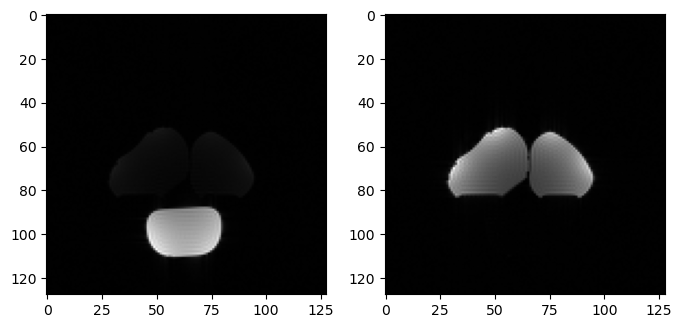

In [49]:
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(2, 2, 1)
ax2 = f.add_subplot(2, 2, 2)
ax.imshow(np.abs(Mw3), cmap='gray')
ax2.imshow(np.abs(Mf3), cmap='gray')
plt.plot()

In [50]:
M_phantom20 = dataset.load_dataset9b(path)
M_phantom90 = dataset.load_dataset9c(path)

Data: 20231222_GASP_PHANTOM data exists
Path: ../..\gasp\../data\20231222_GASP_PHANTOM\gasp_fa20\
Loading files: ['meas_MID219_bSSFP_gasp_knee_fa20_1x1x2_2D_TR6ms_FID58131.dat', 'meas_MID220_bSSFP_gasp_knee_fa20_1x1x2_2D_TR12ms_FID58132.dat', 'meas_MID221_bSSFP_gasp_knee_fa20_1x1x2_2D_TR24ms_FID58133.dat']
pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

read data:   0%|          | 0/4095 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

read data:   0%|          | 0/4095 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

read data:   0%|          | 0/4095 [00:00<?, ?it/s]

Data: 20231222_GASP_PHANTOM data exists
Path: ../..\gasp\../data\20231222_GASP_PHANTOM\gasp_fa90\
Loading files: ['meas_MID216_bSSFP_gasp_knee_fa90_1x1x2_2D_TR6ms_FID58128.dat', 'meas_MID217_bSSFP_gasp_knee_fa90_1x1x2_2D_TR12ms_FID58129.dat', 'meas_MID218_bSSFP_gasp_knee_fa90_1x1x2_2D_TR24ms_FID58130.dat']
pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

read data:   0%|          | 0/4095 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

read data:   0%|          | 0/4095 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

read data:   0%|          | 0/4095 [00:00<?, ?it/s]

In [51]:
def train(bw, shift):
    width = 256
    height = 1
    npcs = 16
    TRs = [5e-3, 10e-3, 20e-3]
    alpha = np.deg2rad(20)
    gradient = 2 * np.pi
    phantom_type = 'line'
    
    D = responses.gaussian(width, bw=bw, shift=shift)
    M = simulation.simulate_ssfp(width=width, height=height, npcs=npcs, TRs=TRs, alpha=alpha, gradient=gradient, phantom_type=phantom_type, phantom_padding=32)
    Ic, An = simulation.train_gasp(M, D, clines=2)
    An = np.array(An)[0]
    return Ic, An, M

(1, 256)
(1, 256)


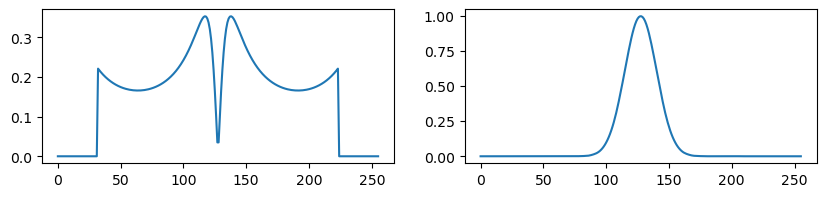

In [52]:
Ic, An, Mtrain = train(bw=0.2, shift=-0)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,2))

_ = np.sqrt(np.sum(np.abs(Mtrain)**2, axis=2))
_ = abs(_[:,:,0,0])
print(_.shape)
ax1.plot(_.T)

_ = np.abs(Ic)
print(_.shape)
ax2.plot(_.T)

In [90]:
def run_gasp(Mdata, An):
    Ic = []
    for cc in range(Mdata.shape[2]):
        Mc = Mdata[:,:,cc,:,:]
        Mc = np.reshape(Mc,(Mc.shape[0], Mc.shape[0], -1))
        _ = GASP.apply_gasp(Mc, An)
        Ic.append(_)
    Ic = np.array(Ic)
    Ic = np.sqrt(np.sum(np.abs(Ic)**2, axis=0))
    return Ic

In [113]:
def plot_sweep(dataset):
    length = len(dataset)
    print(length)
    f = plt.figure(figsize=(20,6))
    for i in range(length):
        data0 = dataset[i][0]
        data1 = dataset[i][1]
        ax = f.add_subplot(2, length, i + 1)
        ax2 = f.add_subplot(2, length, length + i+1)
        ax.imshow(data0, cmap='gray')
        ax.axis('off')
        ax2.plot(np.abs(data1).T)
        ax2.axis('off')
    plt.show()
    
def gasp_sweep(bw=0.13, Mdata = M_phantom20, N = 11, start=-0.5, end=0.5):
    dataset = []
    shifts = np.linspace(start, end, N)
    for shift in shifts:
        Ic, An, _ = train(bw=bw, shift=shift)
        output = run_gasp(Mdata, An)
        dataset.append([output, Ic])
    plot_sweep(dataset)

11


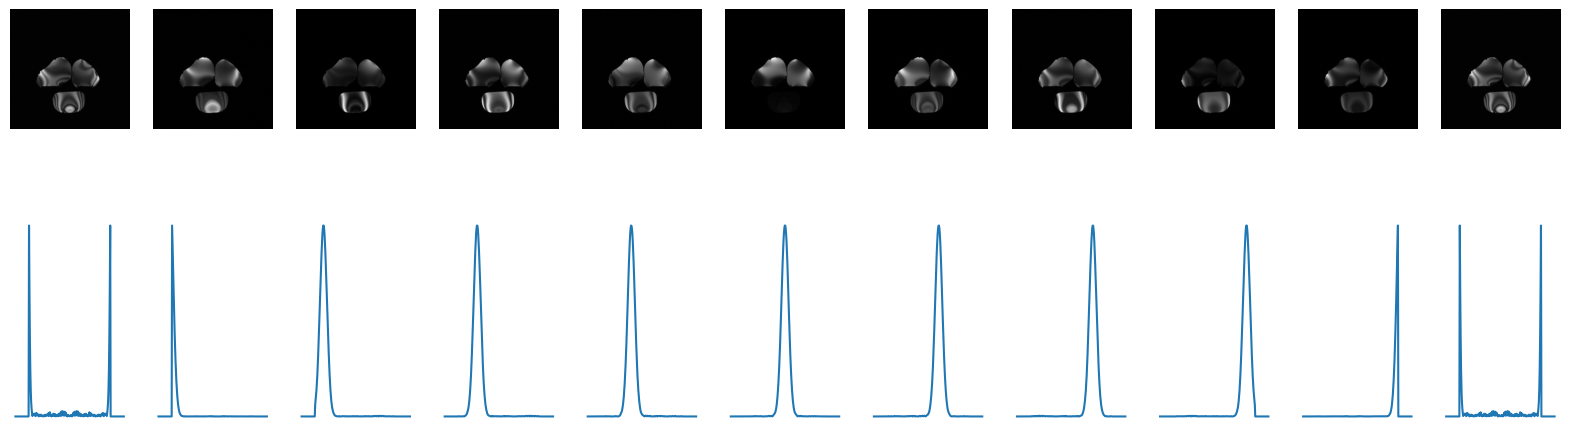

In [114]:
gasp_sweep(bw=0.13, Mdata = M_phantom20)

11


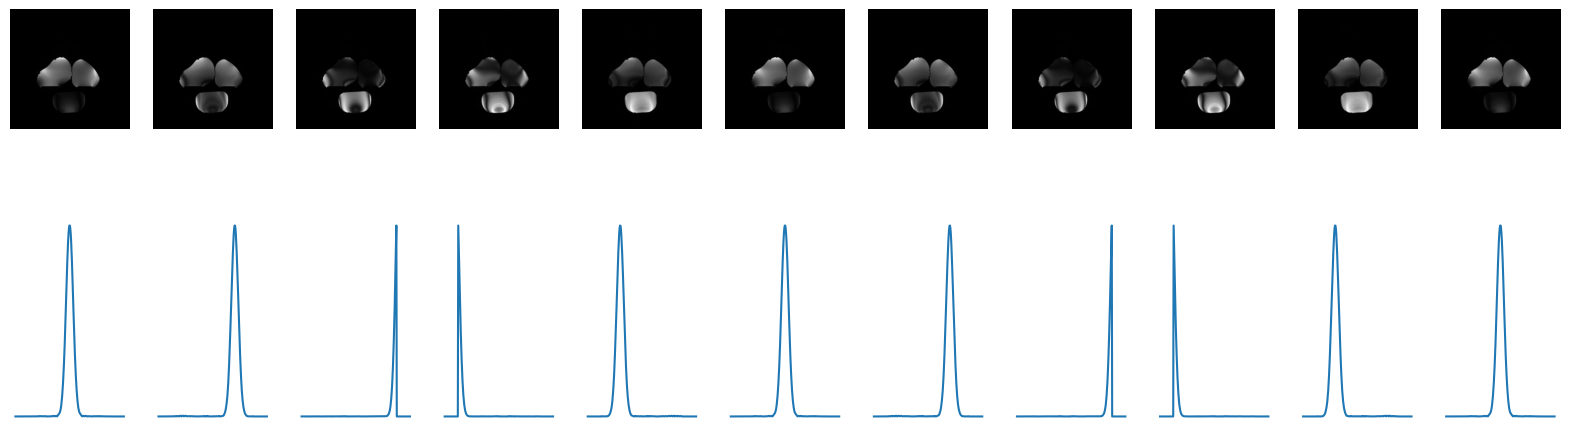

In [115]:
gasp_sweep(bw=0.13, Mdata = M_phantom90, start = -1, end = 1)

In [134]:
def plot_2d_sweep(dataset):
    length = len(dataset)
    f = plt.figure(figsize=(12,12))
    for i in range(length): # shift
        for j in range(length): # bw
            ax = f.add_subplot(length, length, j * length + i + 1)
            ax.imshow(dataset[i][j], cmap='gray')
            #ax1.title.set_text(f" bw:{bw} s:{shift}") 
            ax.axis('off')
    plt.show()
    

def gasp_2d_sweep(Mdata = M_phantom20, bw0 = 0.1, bw1 = 0.4, s0 = -0.5, s1 = 0.5, N = 11):
    dataset = []
    bws = np.linspace(bw0, bw1, N)
    shifts = np.linspace(s0, s1, N)
    for shift in shifts:
        row = []
        for bw in bws:
            print(f'Compute: bw:{bw} s:{shift}')
            Ic, An, _ = train(bw=bw, shift=shift)
            output = run_gasp(Mdata, An)
            row.append(output)
        dataset.append(row)
    plot_2d_sweep(dataset)
    return dataset


Compute: bw:0.1 s:-0.5
Compute: bw:0.13 s:-0.5
Compute: bw:0.16000000000000003 s:-0.5
Compute: bw:0.19000000000000003 s:-0.5
Compute: bw:0.22000000000000003 s:-0.5
Compute: bw:0.25 s:-0.5
Compute: bw:0.28 s:-0.5
Compute: bw:0.31000000000000005 s:-0.5
Compute: bw:0.3400000000000001 s:-0.5
Compute: bw:0.3700000000000001 s:-0.5
Compute: bw:0.4 s:-0.5
Compute: bw:0.1 s:-0.4
Compute: bw:0.13 s:-0.4
Compute: bw:0.16000000000000003 s:-0.4
Compute: bw:0.19000000000000003 s:-0.4
Compute: bw:0.22000000000000003 s:-0.4
Compute: bw:0.25 s:-0.4
Compute: bw:0.28 s:-0.4
Compute: bw:0.31000000000000005 s:-0.4
Compute: bw:0.3400000000000001 s:-0.4
Compute: bw:0.3700000000000001 s:-0.4
Compute: bw:0.4 s:-0.4
Compute: bw:0.1 s:-0.3
Compute: bw:0.13 s:-0.3
Compute: bw:0.16000000000000003 s:-0.3
Compute: bw:0.19000000000000003 s:-0.3
Compute: bw:0.22000000000000003 s:-0.3
Compute: bw:0.25 s:-0.3
Compute: bw:0.28 s:-0.3
Compute: bw:0.31000000000000005 s:-0.3
Compute: bw:0.3400000000000001 s:-0.3
Compute: bw

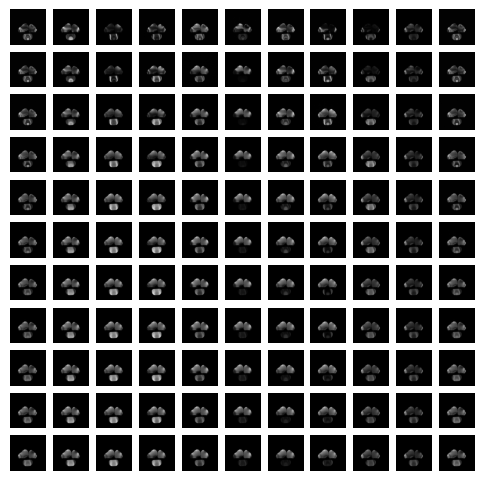

In [135]:
gasp_2d_sweep(M_phantom20)